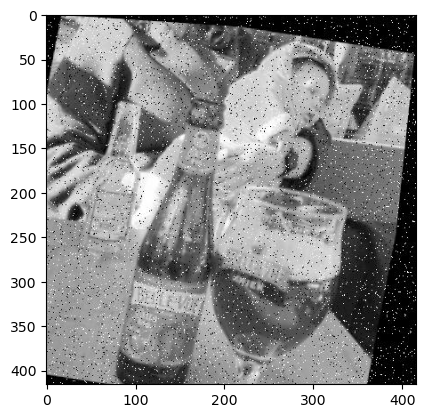

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = r"C:\Users\Administrator\Desktop\Computer Vision\Project\data"

CATEGORIES = ["Beer", "Plastic"]

for category in CATEGORIES:  
    path = os.path.join(DATADIR,category)  
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  
    break  

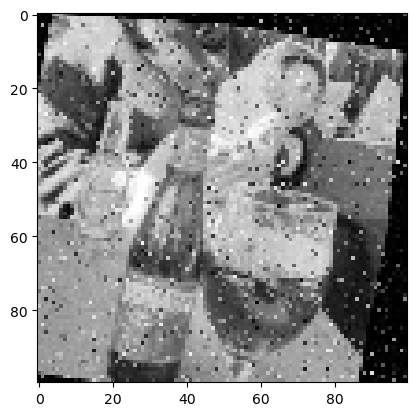

In [9]:
IMG_SIZE = 100

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

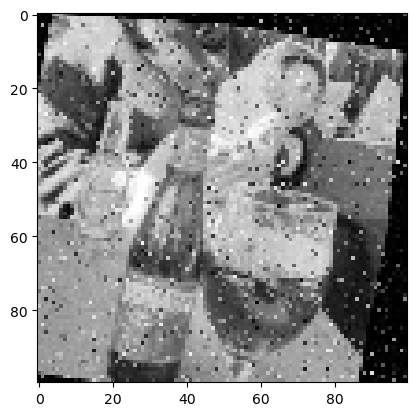

In [11]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do beer plastic

        path = os.path.join(DATADIR,category)  
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=beer 1=plastic

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

100%|██████████████████████████████████████████████████████████████████████████████| 3657/3657 [01:46<00:00, 34.43it/s]


In [12]:
import random

random.shuffle(training_data)

In [13]:
for sample in training_data[:10]:
    print(sample[1])

1
0
0
0
1
0
0
0
0
1


In [14]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[217]
   [216]
   [213]
   ...
   [191]
   [192]
   [192]]

  [[217]
   [217]
   [213]
   ...
   [191]
   [192]
   [192]]

  [[217]
   [214]
   [213]
   ...
   [191]
   [192]
   [192]]

  ...

  [[224]
   [223]
   [222]
   ...
   [185]
   [186]
   [184]]

  [[225]
   [225]
   [223]
   ...
   [185]
   [186]
   [185]]

  [[225]
   [225]
   [223]
   ...
   [187]
   [188]
   [186]]]]


In [15]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [16]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)